In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('churndataset.csv')
x = dataset.iloc[:,3:-1]
y = dataset['Exited']
dataset['Exited'].value_counts()
dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_onehot = pd.get_dummies(x, drop_first = True)
x_train, x_test, y_train, y_test = train_test_split(x_onehot,y,test_size=0.2,random_state=42, stratify=y)
print(x_train)
x_train.describe()

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, InputLayer

from tensorflow.keras.optimizers import Adam

input_shape = x_train.shape[1:]
class_weight = y.value_counts().to_dict()
total_sample = sum(class_weight.values())
class_weight = [total_sample/(len(class_weight)*class_weight[0]), total_sample/(len(class_weight)*class_weight[1])]
class_weight

model = Sequential()
model.add(InputLayer(input_shape))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
2151          753   57       7       0.00              1          1   
8392          739   32       3  102128.27              1          1   
5006          755   37       0  113865.23              2          1   
4117          561   37       5       0.00              2          1   
7182          692   49       6  110540.43              2          0   
...           ...  ...     ...        ...            ...        ...   
4555          688   35       6       0.00              1          1   
4644          712   74       5       0.00              2          0   
8942          667   37       9   71786.90              2          1   
2935          687   35       8  100988.39              2          1   
6206          802   51       7       0.00              1          0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
2151               0        159475.08              False            Fa

In [3]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [3]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

class_weight = {0 : 0.6279040562602034, 1 : 2.454590083456063}
class_weight

history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, class_weight = class_weight)

history.history


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.5501 - accuracy: 0.7240
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4796 - accuracy: 0.7726
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4623 - accuracy: 0.7883
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4542 - accuracy: 0.7916
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4484 - accuracy: 0.7926
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4410 - accuracy: 0.7984
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4366 - accuracy: 0.8002
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4314 - accuracy: 0.8005
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4276 - accuracy: 0.8121
Epoch 10/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4220 - accuracy: 0.8101

{'loss': [0.550070583820343,
  0.4796008765697479,
  0.4623362421989441,
  0.45424193143844604,
  0.4483649730682373,
  0.4409571588039398,
  0.4365663528442383,
  0.43144911527633667,
  0.4275796115398407,
  0.42202362418174744],
 'accuracy': [0.7239999771118164,
  0.7726250290870667,
  0.7882500290870667,
  0.7916250228881836,
  0.7926250100135803,
  0.7983750104904175,
  0.8002499938011169,
  0.8004999756813049,
  0.812125027179718,
  0.8101249933242798]}

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1536      
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18177 (71.00 KB)
Trainable params: 18177 (71.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, class_weight = class_weight, validation_split = 0.1)

history.history


Epoch 1/10
225/225 [==============================] - 1s 4ms/step - loss: 0.4224 - accuracy: 0.8064 - val_loss: 0.3818 - val_accuracy: 0.8112
Epoch 2/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4191 - accuracy: 0.8104 - val_loss: 0.3918 - val_accuracy: 0.8100
Epoch 3/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4134 - accuracy: 0.8154 - val_loss: 0.3565 - val_accuracy: 0.8325
Epoch 4/10
225/225 [==============================] - 1s 2ms/step - loss: 0.4043 - accuracy: 0.8167 - val_loss: 0.3653 - val_accuracy: 0.8188
Epoch 5/10
225/225 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8199 - val_loss: 0.3788 - val_accuracy: 0.8288
Epoch 6/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4004 - accuracy: 0.8144 - val_loss: 0.3932 - val_accuracy: 0.8150
Epoch 7/10
225/225 [==============================] - 1s 3ms/step - loss: 0.3915 - accuracy: 0.8193 - val_loss: 0.3989 - val_accuracy: 0.7987
Epoch 

{'loss': [0.42239493131637573,
  0.41910216212272644,
  0.4134060740470886,
  0.4043368995189667,
  0.3995227813720703,
  0.4004007577896118,
  0.3915129005908966,
  0.38665416836738586,
  0.3843528926372528,
  0.374055951833725],
 'accuracy': [0.8063889145851135,
  0.8104166388511658,
  0.815416693687439,
  0.8166666626930237,
  0.819861114025116,
  0.8144444227218628,
  0.8193055391311646,
  0.8236111402511597,
  0.8266666531562805,
  0.8297222256660461],
 'val_loss': [0.38181713223457336,
  0.39181339740753174,
  0.3564709424972534,
  0.36526256799697876,
  0.37879326939582825,
  0.3932056725025177,
  0.39892756938934326,
  0.37916895747184753,
  0.4255577027797699,
  0.41539236903190613],
 'val_accuracy': [0.8112499713897705,
  0.8100000023841858,
  0.8324999809265137,
  0.8187500238418579,
  0.8287500143051147,
  0.8149999976158142,
  0.7987499833106995,
  0.8187500238418579,
  0.7912499904632568,
  0.8012499809265137]}

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1536      
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18177 (71.00 KB)
Trainable params: 18177 (71.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


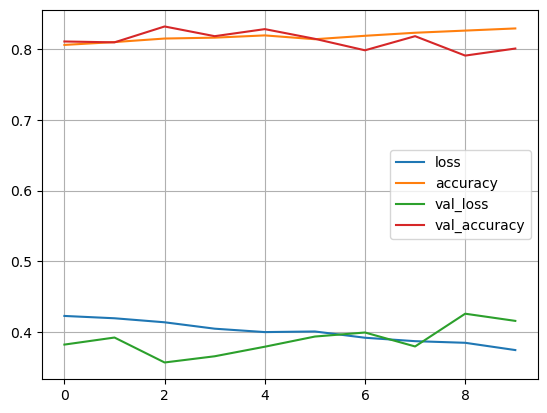

In [7]:
hist = pd.DataFrame(history.history)
hist

hist.plot()
plt.grid()

In [8]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred

y_pred = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1593
           1       0.46      0.74      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.77      0.79      2000



###
## Model Save and Load
###

In [27]:
import pickle
import os

os.makedirs('model', exist_ok = True)

In [38]:
model.save('model/model_churn.keras')

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1536      
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18177 (71.00 KB)
Trainable params: 18177 (71.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
pickle.dump(scaler, open('model/scaler.pkl', 'wb'))

In [41]:
from tensorflow.keras.models import load_model

saved_model = load_model('model_churn.keras')
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18177 (71.00 KB)
Trainable params: 18177 (71.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
xyz = keras.models.load_model('model_churn.keras')
xyz.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18177 (71.00 KB)
Trainable params: 18177 (71.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
x_onehot.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.0,1,1,1,101348.88,False,False,False


In [59]:
columns = x_onehot.columns

In [60]:
pickle.dump(columns, open('model/imp_columns.pkl', 'wb'))